# ---------------------------------RANDOM-FOREST-------------------------------------

## Imports

In [10]:
import pandas as pd
import numpy as np
import csv
from ipykernel import kernelapp as app
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, cross_validation

In [133]:
df = pd.read_csv(open('/Users/sonalichaudhari/Desktop/Combine_Clean_Data.csv','rU'), encoding='utf-8') 
del df['Unnamed: 0']

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


In [2]:
loan_df = pd.read_csv('/Users/sonalichaudhari/Desktop/Loan.csv', low_memory=False) 
del loan_df['Unnamed: 0']
decline_df= pd.read_csv(open('/Users/sonalichaudhari/Desktop/Decline.csv','rU'), encoding='utf-8')
del decline_df['Unnamed: 0']
loan_df=loan_df[['id','loan_amnt', 'purpose', 'risk_score', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month', 'approval']]
decline_df =decline_df[['id','loan_amnt','purpose', 'risk_score', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month','approval']]

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()


In [49]:
loan_df.head()

,id,loan_amnt,purpose,risk_score,dti,zip_code,State,emp_length,Year,Month,approval
0,1,5000.0,credit_card,737.0,27.65,860,AZ,10,2011,12,1
1,2,2500.0,car,742.0,1.00,309,GA,1,2011,12,1
2,3,2400.0,small_business,737.0,8.72,606,IL,10,2011,12,1
3,4,10000.0,other,692.0,20.00,917,CA,10,2011,12,1
4,5,3000.0,other,697.0,17.94,972,OR,1,2011,12,1


In [50]:
decline_df.head()

,id,loan_amnt,purpose,risk_score,dti,zip_code,State,emp_length,Year,Month,approval
0,1,1000.0,Wedding Covered but No Honeymoon,693.0,10.00,481.0,NM,4,2007,5,0
1,2,1000.0,Consolidating Debt,703.0,10.00,10.0,MA,0,2007,5,0
2,3,11000.0,Want to consolidate my debt,715.0,10.00,212.0,MD,1,2007,5,0
3,4,6000.0,waksman,698.0,38.64,17.0,MA,0,2007,5,0
4,5,1500.0,mdrigo,509.0,9.43,209.0,MD,0,2007,5,0


In [3]:
decline_df.shape

(6720919, 11)

In [4]:
loan_df.shape

(1641117, 11)

In [21]:
d= decline_df[:1641127]
l = loan_df[:1641127]
l.shape

(1641117, 11)

In [23]:
com = pd.concat([d,l])
com.shape

(3282244, 11)

## Cross Validation for splitting the data in train and test sets

In [51]:
# columns to consider
cols = ['loan_amnt','emp_length','risk_score','dti']

In [52]:
X = com[cols]
y = com['approval']

#Flatten y into a 1-D array
y = np.ravel(y)

In [53]:
# Splitting the data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.30)

In [55]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# # Converting the categorical data to numeric 
# X_train['pur'] = label_encoder.fit_transform(X_train['purpose'])
# X_test['pur'] = label_encoder.fit_transform(X_test['purpose'])

# X_train['state'] = label_encoder.fit_transform(X_train['State'])
# X_test['state'] = label_encoder.fit_transform(X_test['State'])

In [56]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [57]:
unique, counts = np.unique(y_train, return_counts=True)
print (np.asarray((unique, counts)).T)

[[      0 1148782]
 [      1 1148788]]


### Creating the model

In [60]:
rf = RandomForestClassifier(max_depth = 2,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
# Accuracy of the model created
accuracy = rf.score(X_train, y_train)
print(accuracy)

0.919628128849


In [62]:
# Run the model on the test set
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [41]:
temp_pd = pd.DataFrame()
temp_pd['labels'] = y_train
temp_pd['dummy_col'] = y_train

In [42]:
temp_pd.groupby(by='labels').count().reset_index().head()

,labels,dummy_col
0,0,1148436
1,1,1149134


In [63]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
accuracy_score(y_pred=y_pred, y_true=y_test)
cm

array([[441285,  51060],
       [ 28260, 464069]])

In [65]:
# Predict the values for test and train using the model
y_test_predicted = rf.predict(X_test)
y_train_predicted= rf.predict(X_train)

In [66]:
# Caluclate the rms and mae values
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

MAE_train: 0.0803718711508
MAE_test: 0.0805545794852
RMS_train: 0.0803718711508
RMS_test: 0.0805545794852


In [67]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

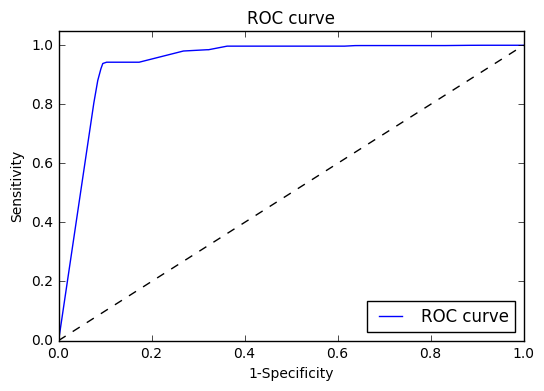

In [68]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()